<a href="https://colab.research.google.com/github/dangi21/AI-Based-Intrusion-Detection-System-IDS-/blob/main/IntrusionDetectionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
np.random.seed(42)
data = {
    'duration': np.random.exponential(scale=2, size=1000),
    'protocol': np.random.choice(['TCP', 'UDP', 'ICMP'], 1000),
    'src_bytes': np.random.randint(0, 10000, 1000),
    'dst_bytes': np.random.randint(0, 10000, 1000),
    'flag': np.random.choice(['SF', 'S0', 'REJ'], 1000),
}

df = pd.DataFrame(data)
df.head()


,duration,protocol,src_bytes,dst_bytes,flag
0,0.938536,ICMP,4437,6142,REJ
1,6.020243,UDP,5435,2819,SF
2,2.633491,ICMP,8435,9094,S0
3,1.825885,ICMP,4107,364,S0
4,0.339250,TCP,560,4258,SF


In [ ]:
# Encode categorical features
le_protocol = LabelEncoder()
le_flag = LabelEncoder()

df['protocol'] = le_protocol.fit_transform(df['protocol'])
df['flag'] = le_flag.fit_transform(df['flag'])

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled[:5]


array([[-0.5177219 , -1.26580872, -0.18328519,  0.43220845, -1.18390912],
       [ 2.09626152,  1.19925208,  0.16215061, -0.75362939,  1.27488448],
       [ 0.35414755, -1.26580872,  1.20053476,  1.48565211,  0.04548768],
       [-0.06127773, -1.26580872, -0.29750744, -1.62971482,  0.04548768],
       [-0.82598936, -0.03327832, -1.52522363, -0.24011129,  1.27488448]])

In [ ]:
# Train the anomaly detection model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df_scaled)

# Predict anomalies
df['anomaly'] = model.predict(df_scaled)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

df['anomaly'].value_counts()


,count
anomaly,
0,950
1,50


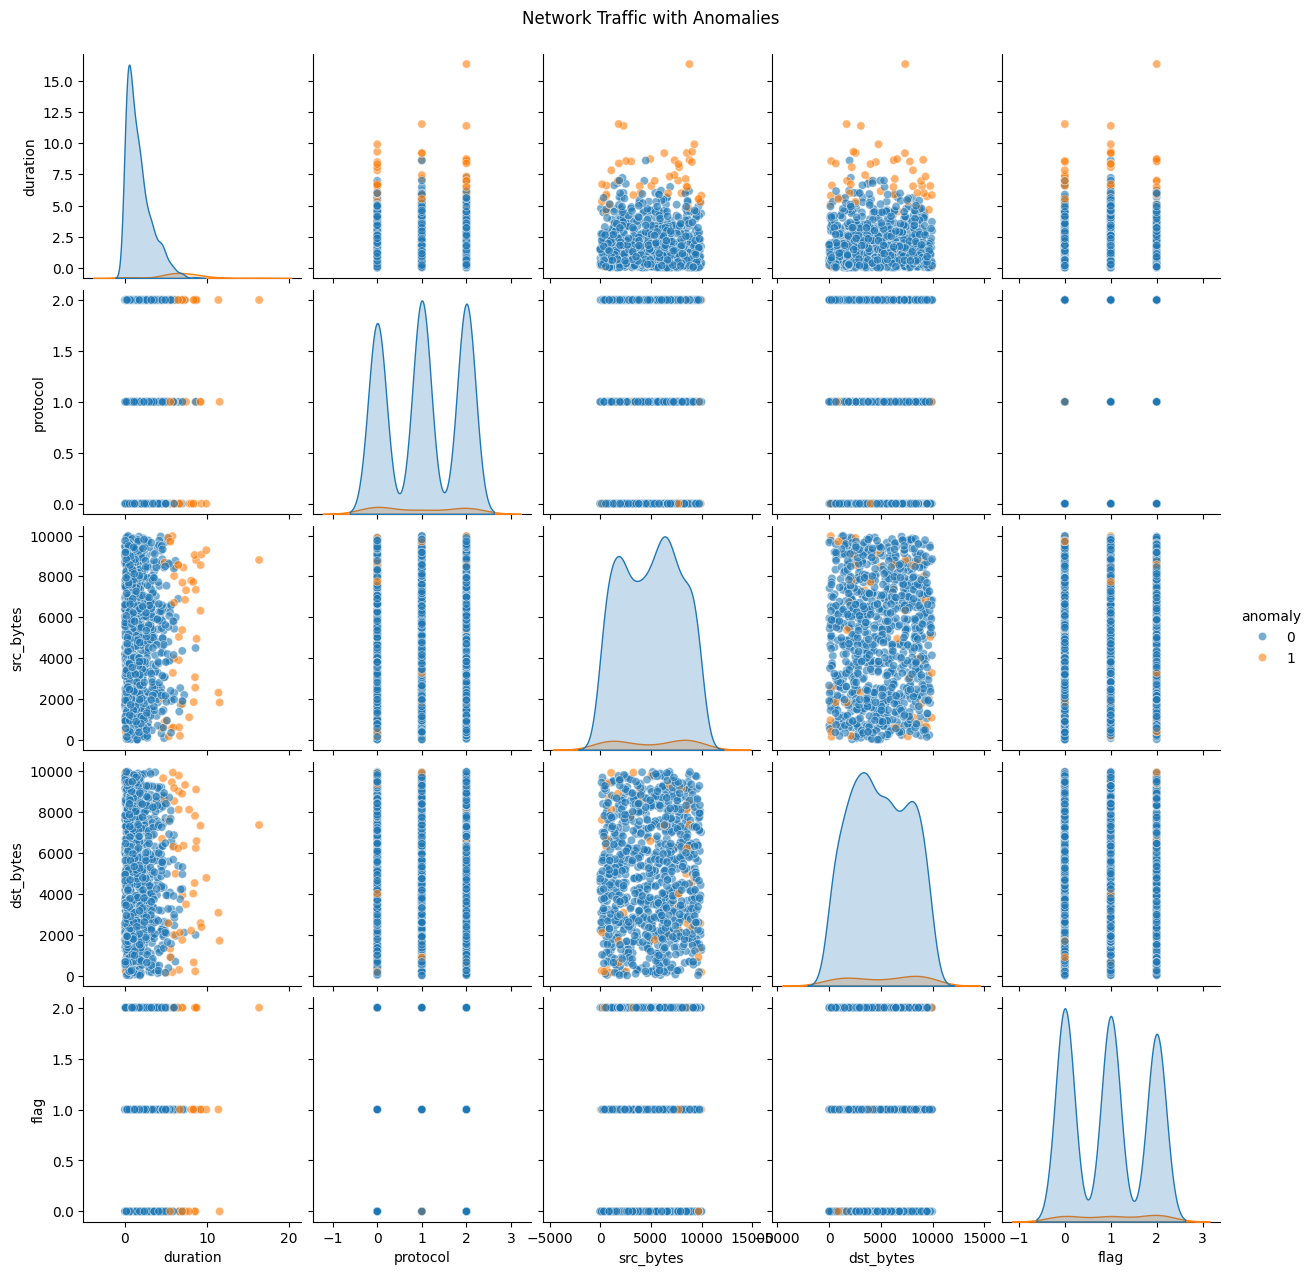

In [ ]:
# Visualize anomalies vs. normal data
sns.pairplot(df, hue='anomaly', plot_kws={'alpha': 0.6})
plt.suptitle("Network Traffic with Anomalies", y=1.02)
plt.show()


In [ ]:
# STEP 1: Authenticate with Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

# STEP 2: Connect to Google Sheet
sheet_id = '1zCn7kxq8mKWYP6P3QgyiqcuRAu_Op3wqIH2LVjut5-Q'
sheet = gc.open_by_key(sheet_id)
worksheet = sheet.sheet1


In [ ]:
# STEP 3: Simulate anomaly detection result
import random
anomaly_count = random.randint(0, 5)  # Simulate 0 to 5 anomalies


In [ ]:
# STEP 4: Log to Google Sheet
import datetime

now = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

if anomaly_count > 0:
    row = [now, anomaly_count, 'Google Colab IDS', 'Intrusion(s) detected in log data']
    worksheet.append_row(row)
    print(f"✅ {anomaly_count} intrusion(s) logged at {now}.")
else:
    print("No intrusions detected — nothing logged.")


✅ 2 intrusion(s) logged at 2025-04-22 10:51:20.
